In [37]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [17]:
kmdb = pd.read_csv('kmdb_basicinfo.csv', engine='python', index_col=False)
kmdb.sample()

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의일,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일
39502,K,2057,성불사의 밤,Night of Seongbul Temple (Seongbulsaui Bam),NaN,극영화,극장용,멜로드라마,대한민국,1970,...,Y,19700121,NaN,NaN,NaN,NaN,NaN,상현이 학도병으로 출정하기 전날 밤에 윤희는 성불사에서 그와의 밤을 보낸다. 그후 ...,NaN,NaN


In [18]:
kmdb.shape

(74444, 25)

In [19]:
kmdb.columns

Index(['영화등록번호ID', '영화등록번호NO', '영화명', '영문제명', '원제명', '유형', '용도', '장르', '제작국가',
       '제작년도', '제작사', '감독', '각본', '출연', '영화심의여부', '대표영화심의일', '대표영화심의번호',
       '대표영화관람등급', '대표개봉일', '대표상영시간', '키워드', '줄거리', 'KMDBURL', '최초등록일',
       '최종수정일'],
      dtype='object')

In [20]:
kmdb.isnull().sum() / len(kmdb) *100

영화등록번호ID      0.000000
영화등록번호NO      0.000000
영화명           0.000000
영문제명         35.188867
원제명          51.673741
유형            0.000000
용도            8.523185
장르           21.245500
제작국가          4.518833
제작년도          8.049003
제작사          37.875450
감독           13.899038
각본           31.821235
출연           48.214765
영화심의여부       31.821235
대표영화심의일      51.010155
대표영화심의번호     64.245607
대표영화관람등급     66.819354
대표개봉일       100.000000
대표상영시간       75.267315
키워드          17.996078
줄거리          52.481060
KMDBURL      29.928537
최초등록일       100.000000
최종수정일         8.687067
dtype: float64

In [33]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['NanumGothic', 'AppleGothic']:
        plt.rcParams['font.family'] = font.name
        break
        
plt.rcParams['font.family']

['NanumGothic']

In [69]:
year_list = pd.DataFrame(kmdb['제작년도'])
year_list = year_list.fillna(0)
kmdb['제작년도_fill'] = year_list

kmdb[['제작년도', '제작년도_fill']].sample(10)

,제작년도,제작년도_fill
46098,2011,2011
31929,2016,2016
42913,2002,2002
21629,1976,1976
7908,2018,2018
13085,1983,1983
31238,2015,2015
20448,2005,2005
36998,2008,2008
51295,2007,2007


# 제작년도로 분리

In [98]:
kmdb2016 = kmdb[kmdb['제작년도'] == '2016']

kmdb2016.sample()

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
36283,F,47483,불륜 주부들:실제 상황 재현,Huteikoui,NaN,극영화,극장용,에로,일본,2016,...,20190220,2019-MF00319,NaN,NaN,60.0,NaN,유부녀들의 성행각를 옴니버스 형태로 엮은 성애 영화,NaN,2019-02-22 09:30:18.0,2016


In [99]:
kmdb2017 = kmdb[kmdb['제작년도'] == '2017']

kmdb2017.sample()

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
49941,K,18761,내 마음이 보이니,(Nae maeumi boini),NaN,극영화,극장용,드라마,대한민국,2017,...,NaN,NaN,NaN,NaN,16.0,"말,운동,호감,일진,학교생활,책임감,텃밭,도움",말수가 적고 운동신경도 둔한데다 키도 작고 별로 예쁘지 않은 지수는 친구들의 호감을...,NaN,2018-12-13 14:07:45.0,2017


In [100]:
kmdb2018 = kmdb[kmdb['제작년도'] == '2018']

kmdb2018.sample()

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
48616,K,17020,아내의 엄마,(Anaeui eomma),NaN,극영화,극장용,에로,대한민국,2018,...,20180214,2018-MF00303,NaN,NaN,80.0,"장모,사위,불륜,성행위,콩가루",장모와 사위의 불륜 성행각을 그린 성애 영화,NaN,2018-03-29 16:34:17.0,2018


In [101]:
kmdb2019 = kmdb[kmdb['제작년도'] == '2019']

kmdb2019.sample()

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
36756,F,48042,도검난무,Touken Ranbu: The Movie,映?刀??舞,극영화,극장용,"액션,시대극/사극,SF,판타지",일본,2019,...,20190502,2019-MF00820,NaN,NaN,100.0,NaN,"가까운 미래, 일본 전국시대 역사를 바꾸려는 시간 역행자들과 맞서 싸우는 역사 수호...",NaN,2019-05-07 11:44:41.0,2019


### 2016년 이후 영화

In [102]:
kmdb_after2016 = pd.concat([kmdb2016, kmdb2017, kmdb2018, kmdb2019])

kmdb_after2016

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
14,K,20322,쑥대머리,(Ssukdaemeori),NaN,뮤직비디오,극장용,뮤직,대한민국,2016,...,NaN,NaN,NaN,NaN,6.0,"판소리,할아버지,할머니",한 판소리꾼이 부채를 펴고 눈을 감는다. 그러자 이야기가 시작된다. 할아버지 무덤을...,NaN,2019-03-22 09:39:07.0,2016
1070,A,6411,위켄즈,Weekends,NaN,다큐멘터리,극장용,"뮤직,동성애",대한민국,2016,...,20161207,2016-MF02003,NaN,20161222,98.0,"음악다큐멘터리,게이,동성애,합창단,퀴어무비,LGBT,성소수자",창단 10주년을 맞는 국내 유일의 게이코러스인 ‘G_Voice’.\t\r\n스무 살...,NaN,2016-02-11 10:50:13.0,2016
1075,A,6417,일사각오,( il-sa-ga-go ),NaN,다큐멘터리,극장용,인물,대한민국,2016,...,20160308,2016-MF00317,NaN,20160317,115.0,"일제강점기,신사참배항거,저항,고문,순교자,신앙","일제 강점기에 신사참배에 반대해 갖은 고문을 당하면서도, 자신의 신앙을 지키며 나라...",NaN,2016-03-21 10:52:52.0,2016
1082,A,6424,노후 대책 없다,No Preparation for Old Age (no-hu dae-chaek ge...,NaN,다큐멘터리,극장용,"인물,뮤직",대한민국,2016,...,20170531,2017-MF00961,NaN,20170629,100.0,"펑크밴드,일상,인디밴드",서울의 펑크밴드들이 도쿄에서 역대 가장 크게 개최되는 하드코어 펑크 음악 페스티벌에...,NaN,2016-04-12 11:15:17.0,2016
1083,A,6425,마담 B,Mrs.B. A North Korean Woman (Ma-dam B),NaN,다큐멘터리,극장용,인물,"대한민국,프랑스",2016,...,20181024,2018-MF02037,NaN,20181115,71.0,"탈북자,불법노동자,무국적,생계유지,남한생활,진실한사랑","“이름을 밝힐 수 없는 그녀, 마담 B.\r\n불법을 넘나드는 그녀의 무국적 멜로드...",NaN,2016-04-12 11:20:18.0,2016
1084,A,6426,물숨,Breathing Underwater,NaN,다큐멘터리,극장용,인물,"대한민국,프랑스",2016,...,20160818,2016-MF01256,NaN,20160929,77.0,"우도,해녀,제주도","제주에는 숨을 멈추고 살아가는 여인들이 있다. 물 한 모금 마시지 않고 하루 7,8...",NaN,2016-04-12 11:21:57.0,2016
1086,A,6430,자백,Spy Nation,NaN,다큐멘터리,극장용,사회,대한민국,2016,...,20160816,2016-MF01220,NaN,20161013,90.0,"국정원,국가정보원,국가보안법,서울시공무원간첩조작사건","2016년, 간첩은 만들어진다!\r\n그들이 정해놓은 완벽한 시나리오! \r\n\r...",NaN,2016-04-28 15:04:07.0,2016
1088,A,6435,핵마피아,The Nuclear Mafia,NaN,다큐멘터리,극장용,"사회,자연ㆍ환경",대한민국,2016,...,NaN,NaN,NaN,NaN,115.0,"핵발전소,원자력발전소,환경오염,환경보호",“핵마피아”를 만나기 위한 시민탐정들의 용감한 여정이 시작된다.,NaN,2016-05-13 14:48:18.0,2016
1089,A,6435,핵마피아,The Nuclear Mafia,NaN,다큐멘터리,극장용,"사회,자연ㆍ환경",대한민국,2016,...,NaN,NaN,NaN,NaN,115.0,"핵발전소,원자력발전소,환경오염,환경보호",Program Note\r\n고리의 핵발전소 폐쇄 싸움과 밀양의 송전탑 반대 투쟁 ...,NaN,2016-05-13 14:48:18.0,2016
1090,A,6453,내 사랑 한옥마을,"Dearest, Hanok Village (Nae-sa-rang Han-og-ma-...",NaN,다큐멘터리,극장용,지역,대한민국,2016,...,NaN,NaN,NaN,NaN,92.0,NaN,아빠는 2년 전 전주한옥마을에서 한지를 이용한 사진인화 사업을 시작했다. 사업은 성...,NaN,2016-05-13 15:33:23.0,2016


In [106]:
data = kmdb['장르'].value_counts().head(20)

pd.DataFrame(data)

data_after2016 = kmdb_after2016['장르'].value_counts().head(20)

pd.DataFrame(data_after2016)

,장르
드라마,2205
에로,1646
공포,167
인물,158
코메디,153
액션,133
멜로드라마,129
스릴러,100
"멜로드라마,에로",98
"드라마,가족",97


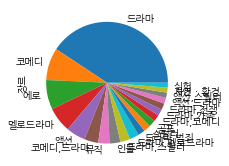

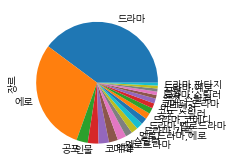

In [110]:
plt.subplot(1, 2, 1)
data.plot.pie()
plt.show()

plt.subplot(1, 2, 2)
data_after2016.plot.pie()
plt.show()

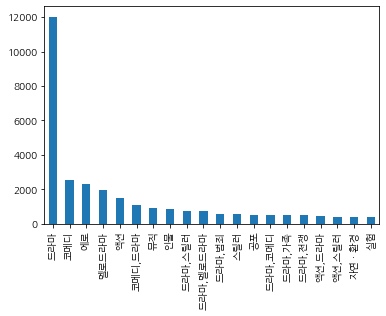

In [114]:
data.plot.bar()

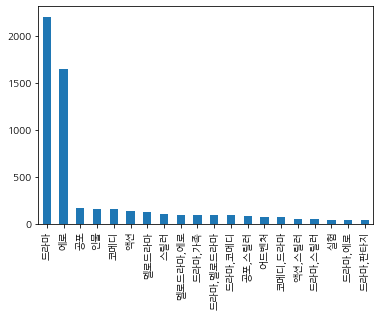

In [115]:
data_after2016.plot.bar()

## 한국영화 장르

In [ ]:
data = kmdb[kmdb_after2016['제작국가'] == '대한민국']['장르'].value_counts().head(20)

pd.DataFrame(data)

In [123]:
data = kmdb_after2016[kmdb_after2016['제작국가'] == '대한민국']['장르'].value_counts().head(20)

pd.DataFrame(data)

,장르
드라마,1591
에로,637
"멜로드라마,에로",96
인물,84
멜로드라마,76
"드라마,가족",61
코메디,61
"드라마,코메디",50
"드라마,에로",42
스릴러,39


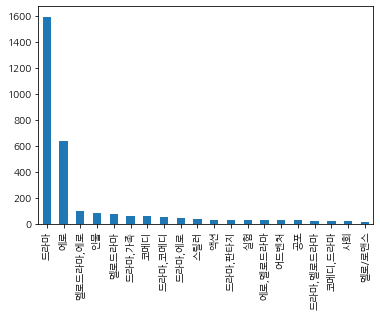

In [124]:
data.plot.bar()

In [129]:
kmdb_after2016_kor = kmdb_after2016[kmdb_after2016['제작국가'] == '대한민국']
ero_kor2016 = kmdb_after2016_kor[kmdb_after2016_kor['장르'] == '에로']

In [125]:
data = kmdb_after2016[kmdb_after2016['제작국가'] == '미국']['장르'].value_counts().head(20)

pd.DataFrame(data)

,장르
드라마,112
공포,87
"공포,스릴러",48
코메디,30
액션,27
스릴러,27
"액션,스릴러",25
"액션,범죄,스릴러",20
"코메디,드라마",17
"드라마,스릴러",15


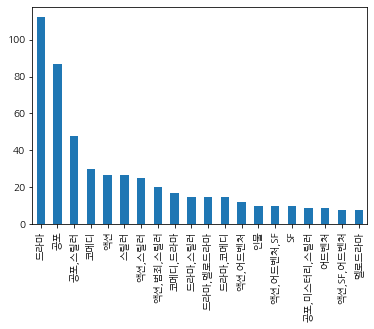

In [126]:
data.plot.bar()

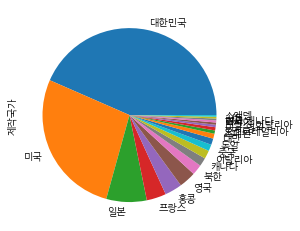

In [42]:
data = kmdb['제작국가'].value_counts().head(20)

pd.DataFrame(data)

data.plot.pie()
plt.show()

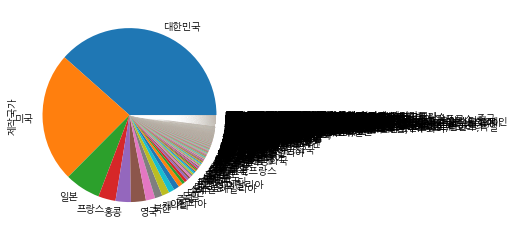

In [116]:
data_after2016 = kmdb['제작국가'].value_counts(20)

pd.DataFrame(data_after2016)

data_after2016.plot.pie()
plt.show()

In [47]:
data = kmdb['제작년도'].value_counts()

pd.DataFrame(data)

,제작년도
2017,3271
2018,2367
2016,2336
2012,1854
2013,1795
2014,1742
2015,1684
2009,1657
2011,1567
2008,1557


# 감독

In [144]:
kmdb_director = kmdb['감독'].value_counts().head(20)

pd.DataFrame(kmdb_director)

,감독
조르쥬 멜리에스,172
김수용,127
고영남,112
임권택,106
이형표,92
김기덕,91
신상옥,77
심우섭,69
장일호,64
최인현,64


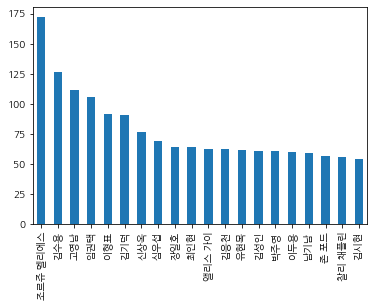

In [145]:
kmdb_director.plot.bar()

## 한국영화 감독

In [159]:
kmdb_director_kor = kmdb[kmdb['제작국가'] == '대한민국']['감독'].value_counts().head(50)

kmdb_director_kor = pd.DataFrame(kmdb_director_kor).reset_index()

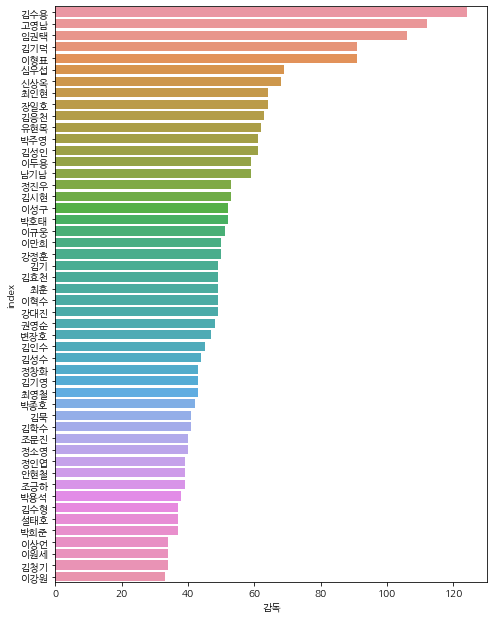

In [165]:
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 2])
sns.barplot(x='감독', y='index', data=kmdb_director_kor)

# 16년 이후 한국영화 감독

In [166]:
kmdb_after2016_director_kor = kmdb_after2016[kmdb_after2016['제작국가'] == '대한민국']['감독'].value_counts().head(50)

kmdb_after2016_director_kor = pd.DataFrame(kmdb_after2016_director_kor).reset_index()

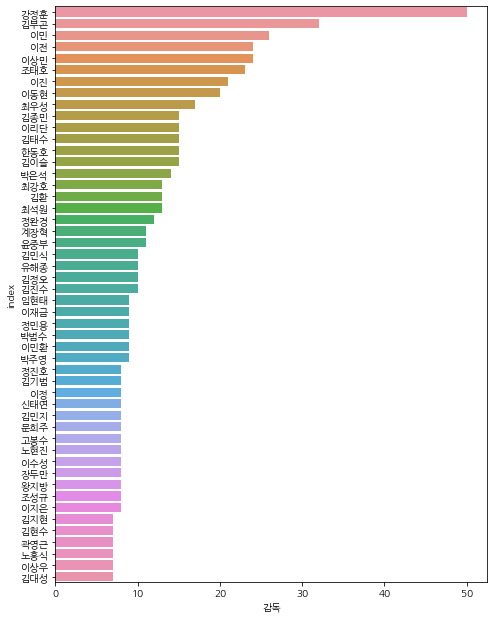

In [167]:
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 2])
sns.barplot(x='감독', y='index', data=kmdb_after2016_director_kor)

In [181]:
kmdb[kmdb['감독'] == '이지은']

,영화등록번호ID,영화등록번호NO,영화명,영문제명,원제명,유형,용도,장르,제작국가,제작년도,...,대표영화심의번호,대표영화관람등급,대표개봉일,대표상영시간,키워드,줄거리,KMDBURL,최초등록일,최종수정일,제작년도_fill
45373,K,11806,미래경,futuroscope (Miraegyeong),NaN,극영화,극장용,드라마,대한민국,2006,...,NaN,NaN,NaN,NaN,17.0,"고3,미래경,희망",특별히 되고 싶은 것도 없고 의욕도 없고.. 그래서인지 미래가 더욱 두려운 평범한 ...,NaN,2010-05-10 11:18:08.0,2006
49280,K,17990,림보,Limbo (Rim-bo),NaN,극영화,극장용,"드라마,판타지",대한민국,2018,...,NaN,NaN,NaN,NaN,25.0,NaN,"보연의 죽음을 부정하는 수향은 생각을 떨쳐 내기 위해, 약을 먹고 잠들게 된다. 그...",NaN,2018-11-09 16:19:26.0,2018
49568,K,18332,I am,I am,NaN,극영화,극장용,드라마,대한민국,2016,...,NaN,NaN,NaN,NaN,23.0,NaN,그녀가 힘들어한다.\r\n나는 더 이상 바라볼 수만은 없다.,NaN,2018-12-07 11:53:19.0,2016
51707,K,20939,약혼녀의 언니,(Yakonnyeoui eonni),NaN,극영화,극장용,에로,대한민국,2019,...,20190708,2019-MF01313,NaN,NaN,96.0,NaN,남편과 사별하고 혼자사는 여자의 성행각을 다룬 성애 영화,NaN,2019-07-10 10:55:07.0,2019
51824,K,21073,음란한 여자들의 수다,(Eumnanhan yeojadeurui suda),NaN,극영화,극장용,에로,대한민국,2019,...,20190724,2019-MF01481,NaN,NaN,98.0,NaN,과도한 욕망을 드러낸 30대 부부의 이야기,NaN,2019-07-26 14:33:17.0,2019
51834,K,21090,아내의 음란한 유혹,(Anaeui eumnanhan yuhok),NaN,극영화,극장용,에로,대한민국,2019,...,20190729,2019-MF01504,NaN,NaN,100.0,NaN,여성들의 빗나간 욕정을 그린 성애 영화,NaN,2019-07-31 11:22:05.0,2019
51835,K,21091,완벽한 타인 : 비밀의 스와핑,(Wanbyeokan tain : bimirui seuwaping),NaN,극영화,극장용,에로,대한민국,2019,...,20190729,2019-MF01503,NaN,NaN,97.0,NaN,여러 남녀들의 불륜을 다룬 성애 영화,NaN,2019-07-31 11:25:02.0,2019
51966,K,21314,정리,Arrangement (Jeongni),NaN,극영화,극장용,드라마,대한민국,2018,...,NaN,NaN,NaN,NaN,15.0,NaN,독거노인과 고물 로봇이 함께 삶을 정리한다.,NaN,2019-09-10 11:26:38.0,2018
51973,K,21321,젊은 부부의 집,(Jeolmeun bubuui jip),NaN,극영화,극장용,드라마,대한민국,2017,...,20190909,2019-MF01921,NaN,NaN,15.0,NaN,보모와 아이의 우정을 그린 단편영화,NaN,2019-09-16 14:10:01.0,2017


# 에로영화 제외 2016년 감독

In [183]:
kmdb_after2016_director_kor_notero = kmdb_after2016[(kmdb_after2016['제작국가'] == '대한민국') & (kmdb_after2016['장르'] != '에로')]['감독'].value_counts().head(50)

kmdb_after2016_director_kor_notero = pd.DataFrame(kmdb_after2016_director_kor_notero).reset_index()

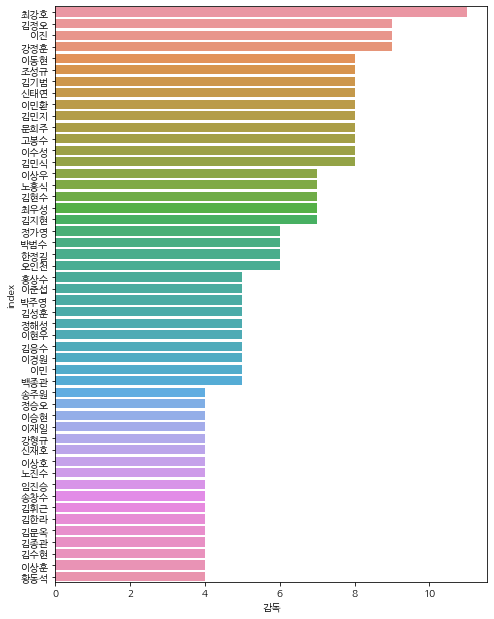

In [184]:
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 2])
sns.barplot(x='감독', y='index', data=kmdb_after2016_director_kor_notero)

In [186]:
kmdb.columns

Index(['영화등록번호ID', '영화등록번호NO', '영화명', '영문제명', '원제명', '유형', '용도', '장르', '제작국가',
       '제작년도', '제작사', '감독', '각본', '출연', '영화심의여부', '대표영화심의일', '대표영화심의번호',
       '대표영화관람등급', '대표개봉일', '대표상영시간', '키워드', '줄거리', 'KMDBURL', '최초등록일',
       '최종수정일', '제작년도_fill'],
      dtype='object')

In [189]:
kmdb_after2016['제작년도'].value_counts()

2017    3271
2018    2367
2016    2336
2019     943
Name: 제작년도, dtype: int64